# Step3 演習03 Kerasチュートリアル
---

本演習は、Pythonで書かれた深層学習のフレームワーク Keras を使ったチュートリアルです。

Kerasを使い手書き数字の画像 MNISTの多クラス分類をおこないます。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での利用は避けてください。

**本演習の目的**
- Kerasを使った基本的な記述手順を身につける。
- Kerasを使ってMNISTの多クラス分類の実装してみる。

**【課題１】** 採点を実行してください。

In [1]:
#Coursedele-02 Step3 QuestionNumber5 5e6e4c3e443950e8e029a9aa1f402f72
print("この課題の採点は全員正解とします。")

この課題の採点は全員正解とします。


** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [2]:
%%bash
./validation_client.py dele-02 3 5 Step3_03.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



## ライブラリのインポート

まずはじめに、本演習で利用するライブラリのインポートをします。ライブラリのインポートは作業を行うときには一番はじめに行うようにしましょう。

- [numpy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント
- [Keras](https://keras.io/ja/) Pythonの深層学習ライブラリKerasの公式ドキュメント

In [3]:
#ライブラリのインポート
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [4]:
keras.__version__

'2.1.5'

## データセット

この演習では "MNIST" と呼ばれる手書き数字のデータを用います。

28ピクセル×28ピクセルのグレースケール画像が学習用データとして55,000枚、テスト用データとして10,000枚含まれています。今回はtensorflowで用意されている関数からデータを読み込みます。

read_data_setsの引数は
1. ファイルの保存場所
2. one_hot: one-hotベクトル化するかどうか
3. validation_size: 検証用データの枚数、今回は訓練データとテストデータのみ使用します
4. source_url: データセットのダウンロード元

使用しているネットワークの強さによりロードに多少時間がかかる場合があります。

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


ダウンロードしたデータセットを**訓練データ**と**テストデータ**にそれぞれ定義しておきます。

In [6]:
X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

print("X_train：訓練データ")
print("y_train：訓練データの正解ラベル")
print("X_test：テストデータ")
print("y_test：テストデータの正解ラベル")

X_train：訓練データ
y_train：訓練データの正解ラベル
X_test：テストデータ
y_test：テストデータの正解ラベル


訓練データとテストデータのshapeを確認します。

In [7]:
print("訓練データ数：{}".format(X_train.shape[0]))
print("訓練データ数の特徴（ピクセル）：{}".format(X_train.shape[1]))
print("テストデータ数：{}".format(X_test.shape[0]))
print("テストデータ数の特徴（ピクセル）：{}".format(X_test.shape[1]))

訓練データ数：55000
訓練データ数の特徴（ピクセル）：784
テストデータ数：10000
テストデータ数の特徴（ピクセル）：784


"X_train：訓練データ"は、学習用データの55000枚の画像データを行列にしたもの（28×28=784）として格納されています。

同様に、"X_test：テストデータ"は、テスト用データの10000枚の画像データを行列にしたもの（28×28=784）として格納されています。

### データの視覚化

ここで学習データの画像をランダムに表示させてみます。セルを実行するたびに画像が変わります。

数字：3


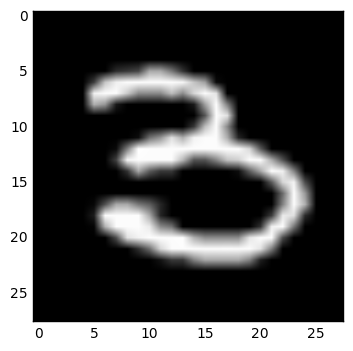

In [8]:
num = np.random.randint(0, len(mnist.train.images))
plt.imshow(mnist.train.images[num].reshape(28, 28), cmap='gray')
print("数字：{}".format(np.argmax(mnist.train.labels[num])))

次に正解ラベルを見てみます。正解ラベルとなる y_train のshapeは(55000,10)です。次のセルを実行して訓練データとテストデータの正解ラベルのデータの性質を確認します。

In [9]:
print("訓練データの正解ラベル数：{}".format(y_train.shape[0]))
print("訓練データ数の正解ラベルの配列数：{}".format(y_train.shape[1]))
print("テストデータの正解ラベル数：{}".format(y_test.shape[0]))
print("テストデータ数の正解ラベルの配列数：{}".format(y_test.shape[1]))

訓練データの正解ラベル数：55000
訓練データ数の正解ラベルの配列数：10
テストデータの正解ラベル数：10000
テストデータ数の正解ラベルの配列数：10


訓練データの場合、正解ラベル数は55000となっており、それぞれに対して答えとなるラベル部分には「１」が与えられています。下のセルを実行してみましょう。

In [10]:
y_train[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

例えば、数字の０に対応する正解ラベルは配列の0番目に１がはいっています。数字の1に対応するラベルには配列の1番目に1がはいっています。３以降も同様のルールです。下の画像はこれらのルールを可視化したものになります。
<p>

<div align="center"  style="width:50%">
<img src="./img/step3_mnist_label_019.png"></div>

### データセットのシャッフル

MNISTのデータセットをシャッフルします。データセットをそのまま使わずにシャッフルするのはなぜでしょうか。例えば、データがラベル(y)に対してソートされていたとします。すると、そのまま冒頭3000サンプルを取って学習に使うと、0, 1と書いてあるデータばかりが集まってしまうことになってしまいます。一見分からないような規則でソートされている可能性もあるので、データセットの順番がバラバラに見えても必ず最初にシャッフルしましょう。

In [11]:
#データセットのシャッフル
permutation = np.random.permutation(mnist.train.images.shape[0])
X_train = mnist.train.images[permutation]
y_train = mnist.train.labels[permutation]

### データセットの正規化

データセット全体が平均0.0，分散1.0となるように正規化します。

In [14]:
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

 ## ニューラルネットワークモデル

入力層のユニット数は特徴の数である784個、出力層は0~9の数字の10クラス、隱れ層のユニット数は100個とします。
<br>
今回は下に示すネットワークのモデルを構築します。

- 入力層のユニット数784個
- 隠れ層のユニット数100個
- 出力層のユニット数10個


**モデル**:
<div style="width:40%">
<img src="./img/step3_mlp_784-10.png"><div>

## モデルの実装

データセットの準備ができたので実際にKerasによるニューラルネットワークの実装を行いましょう。

Kerasの基本的なデータ構造はmodelでネットワークを構成します。モデルは keras.models.Sequential クラスを使って構築します。

In [16]:
#KerasのSequentialをインポート
from keras.models import Sequential
model = Sequential()

ネットワークの層を追加するには** .add()メソッド **を利用します。model.add()で層を追加することができ、Denseで主に下記の引数を指定します。

モデルを構築するには下記のように記述します。

model.add(Dense(引数を指定))

```py
keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
                   bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
                   activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```

- units：正の整数で出力の次元数を指定
- activation：活性化関数
- use_bias：バイアス$b$（デフォルトは"True"）
- kernel_initializer：重みの初期化方法
- bias_initializer： バイアスベクトルの初期化方法
- kernel_regularizer：重み行列に適用される正則化関数

** Denseが実行する操作 **

ニューラルネットワークの一般形の演算を行います。具体的には次の通りです。

$y = f(w^{\top}x + b)$

各関数のドキュメントは次の通りです。

- [Keras：Dense](https://keras.io/ja/layers/core/) 全結合ニューラルネットワーク
- [Keras：Activation](https://keras.io/ja/activations/) 使用する活性化関数
- [Keras：kernel_regularizer](https://keras.io/ja/regularizers/) 正則化


**【確認１】** 適切な 関数・変数・値 などにNoneを書き換えてください。

In [20]:
# DenseとActivationをインポートする
from keras.layers import Dense,  Activation

#インスタンスを作成
model = Sequential()

#一番初めののレイヤーではinput_shapeで、入力するデータの次元を与えます
model.add(Dense(units=100, input_shape=(784,)))  
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

### コスト関数と最適化手法の決定

次にコスト関数と最適化アルゴリズムを定義します。

** model.summary() ** と記述することで実装したモデルの構成を表で表示してくれます。<br>
** model.compile() **でコスト関数や最適化手法を決定をします。

compileでは下記の３つの引数を指定します。

- loss（損失関数）
- optimizer（最適化アルゴリズム、rmspropやadagradなどを指定）
- metrics（評価関数）

それぞれ指定します。下のセルを参考にしてください。

各関数のドキュメントは次の通りです。
- [Keras：summary](https://keras.io/ja/models/about-keras-models/) 
- [Keras：compile](https://keras.io/ja/getting-started/sequential-model-guide/) 
- [Keras：optimizer](https://keras.io/ja/optimizers/) 

In [21]:
model.summary() 
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### モデルの学習

構築したモデルの学習には** model.fit() **を使います。学習データ、バッチサイズ、エポック数、ログの出力、バリデーションデータの設定をします。

下記に主な引数を示します。

- x：学習に使用する訓練データ
- y：学習に使用する正解ラベル
- batch_size：バッチサイズ
- epochs：エポック数
- verbose：学習中のログ（0:標準出力にログを出力しません、1：プログレスバーで出力、2:エポックごとに1行のログを出力）
- validation_data：各エポックごとに利用するモデルを評価する

関数のドキュメント

- [Keras：fit](https://keras.io/ja/models/model/) 

下のセルを実行すると学習がはじまります。

In [22]:
history = model.fit(X_train, y_train,   # 訓練データ
                    batch_size=100,   #バッチサイズ
                    epochs=10,     # エポック数の指定
                    verbose=1,         # ログ出力の指定. 0だとログが出ない
                    validation_data=(X_test, y_test)  # テストデータ
                    )

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 49us/step - loss: 0.5849 - acc: 0.8303 - val_loss: 0.3281 - val_acc: 0.9088
Epoch 2/10
55000/55000 [==============================] - 2s 36us/step - loss: 0.3124 - acc: 0.9102 - val_loss: 0.2680 - val_acc: 0.9244
Epoch 3/10
55000/55000 [==============================] - 2s 36us/step - loss: 0.2633 - acc: 0.9239 - val_loss: 0.2383 - val_acc: 0.9322
Epoch 4/10
55000/55000 [==============================] - 2s 36us/step - loss: 0.2338 - acc: 0.9326 - val_loss: 0.2175 - val_acc: 0.9389
Epoch 5/10
55000/55000 [==============================] - 2s 36us/step - loss: 0.2124 - acc: 0.9386 - val_loss: 0.2004 - val_acc: 0.9445
Epoch 6/10
55000/55000 [==============================] - 2s 37us/step - loss: 0.1950 - acc: 0.9440 - val_loss: 0.1882 - val_acc: 0.9485
Epoch 7/10
55000/55000 [==============================] - 2s 36us/step - loss: 0.1810 - acc: 0.9482 - val_loss: 0.1769 - val_acc

### モデルの評価

学習後のモデルに対してテストデータで評価を行うには** model.evaluate() **を使います。訓練データ、正解ラベル、バッチサイズを渡します。

- x：評価に使用するテストデータ
- y：評価に使用する正解ラベル
- batch_size：バッチサイズ
- verbose：学習中のログ（0：表示しない、1：表示する）

関数のドキュメント

- [Keras：evaluate](https://keras.io/ja/models/sequential/) 

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 31us/step
Test loss: 0.15399948420226575
Test accuracy: 0.9573


### モデルの誤差

最後に訓練データとテストデータにおける学習中のコスト関数の減少を確認し、モデルの誤差を評価します。

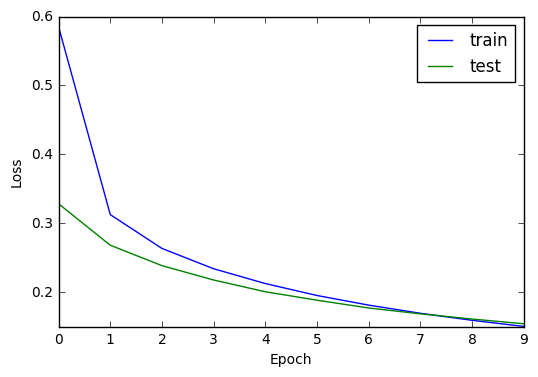

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

## おつかれさまでした。

Kerasを使ったニューラルネットワークの実装おつかれさまでした。

Kerasでは、model.add と記述し層を積み上げるだけで簡単にニューラルネットワークのモデルの構築、実装、評価を行うことができました。